In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from tqdm.auto import tqdm
sys.path.insert(0, os.path.abspath("../fsrs-optimizer/src/fsrs_optimizer/"))

tqdm.pandas()

In [4]:
group = ["user_id", "card_id"]
df = pd.read_parquet(
    "../anki-revlogs-10k/revlogs", filters=[("user_id", "<", 150), ("duration", ">", 0)], columns=["card_id", "duration", "user_id"]
)
# https://stackoverflow.com/a/47207283/24162642
df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,card_id,duration
count,9731118,9731118
mean,12625,12895
std,13908,16407
min,0,1
25%,2393,3675
50%,6992,6791
75%,18020,14054
max,67505,1000000


In [5]:
group_sizes = df.groupby(group).filter(lambda x: len(x) > 5)

/tmp/ipykernel_14742/349365226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df.groupby(group).filter(lambda x: len(x) > 5)


In [6]:
second_average = df.groupby(group)["duration"].mean() / 1000
second_average.dropna(inplace=True)
second_average

/tmp/ipykernel_14742/1705999295.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  second_average = df.groupby(group)["duration"].mean() / 1000


user_id  card_id
1        0          21.982417
         1          21.161000
         2           9.254600
         3          10.478875
         4          19.205100
                      ...    
99       4182       60.000000
         4183       60.000000
         4184        7.125000
         4185       60.000000
         4186       60.000000
Name: duration, Length: 1389052, dtype: float64

In [14]:
second_average.describe().apply(lambda x: format(x, 'f'))

count    1389052.000000
mean          12.939422
std           12.747078
min            0.109500
25%            5.000000
50%            9.034500
75%           16.957000
max         1000.000000
Name: duration, dtype: object

# Cards by average duration per review

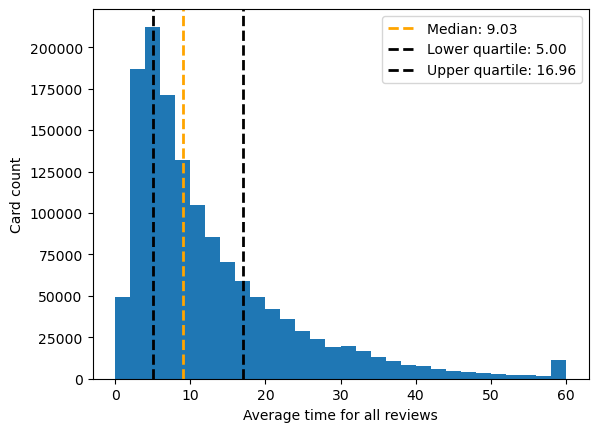

In [7]:
plt.clf()
plt.hist(second_average, bins=30, range=(0, 60))
median = second_average.median()
LQ = second_average.quantile(.25)
UQ = second_average.quantile(.75)
plt.axvline(
    median,
    color="orange",
    linestyle="dashed",
    linewidth=2,
    label=f"Median: {median:.2f}",
)
plt.axvline(
    LQ,
    color="black",
    linestyle="dashed",
    linewidth=2,
    label=f"Lower quartile: {LQ:.2f}",
)
plt.axvline(
    UQ,
    color="black",
    linestyle="dashed",
    linewidth=2,
    label=f"Upper quartile: {UQ:.2f}",
)
plt.ylabel("Card count")
plt.xlabel("Average time for all reviews")

plt.legend()